In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Downloads/winequalityN.csv")

In [3]:
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
df.shape

(6497, 13)

In [5]:
df.quality.unique()
df.type.unique()

array(['white', 'red'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
(df.isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
col=['residual sugar','chlorides','sulphates']
for i in col:
    df[col].fillna(df[col].mean(),inplace=True)

In [9]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df.shape

(6497, 13)

In [11]:
df.dropna(how='any',inplace=True)

In [12]:
df.shape

(6463, 13)

In [13]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
df['type']=df['type'].map({'white':1,'red':0})

In [15]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


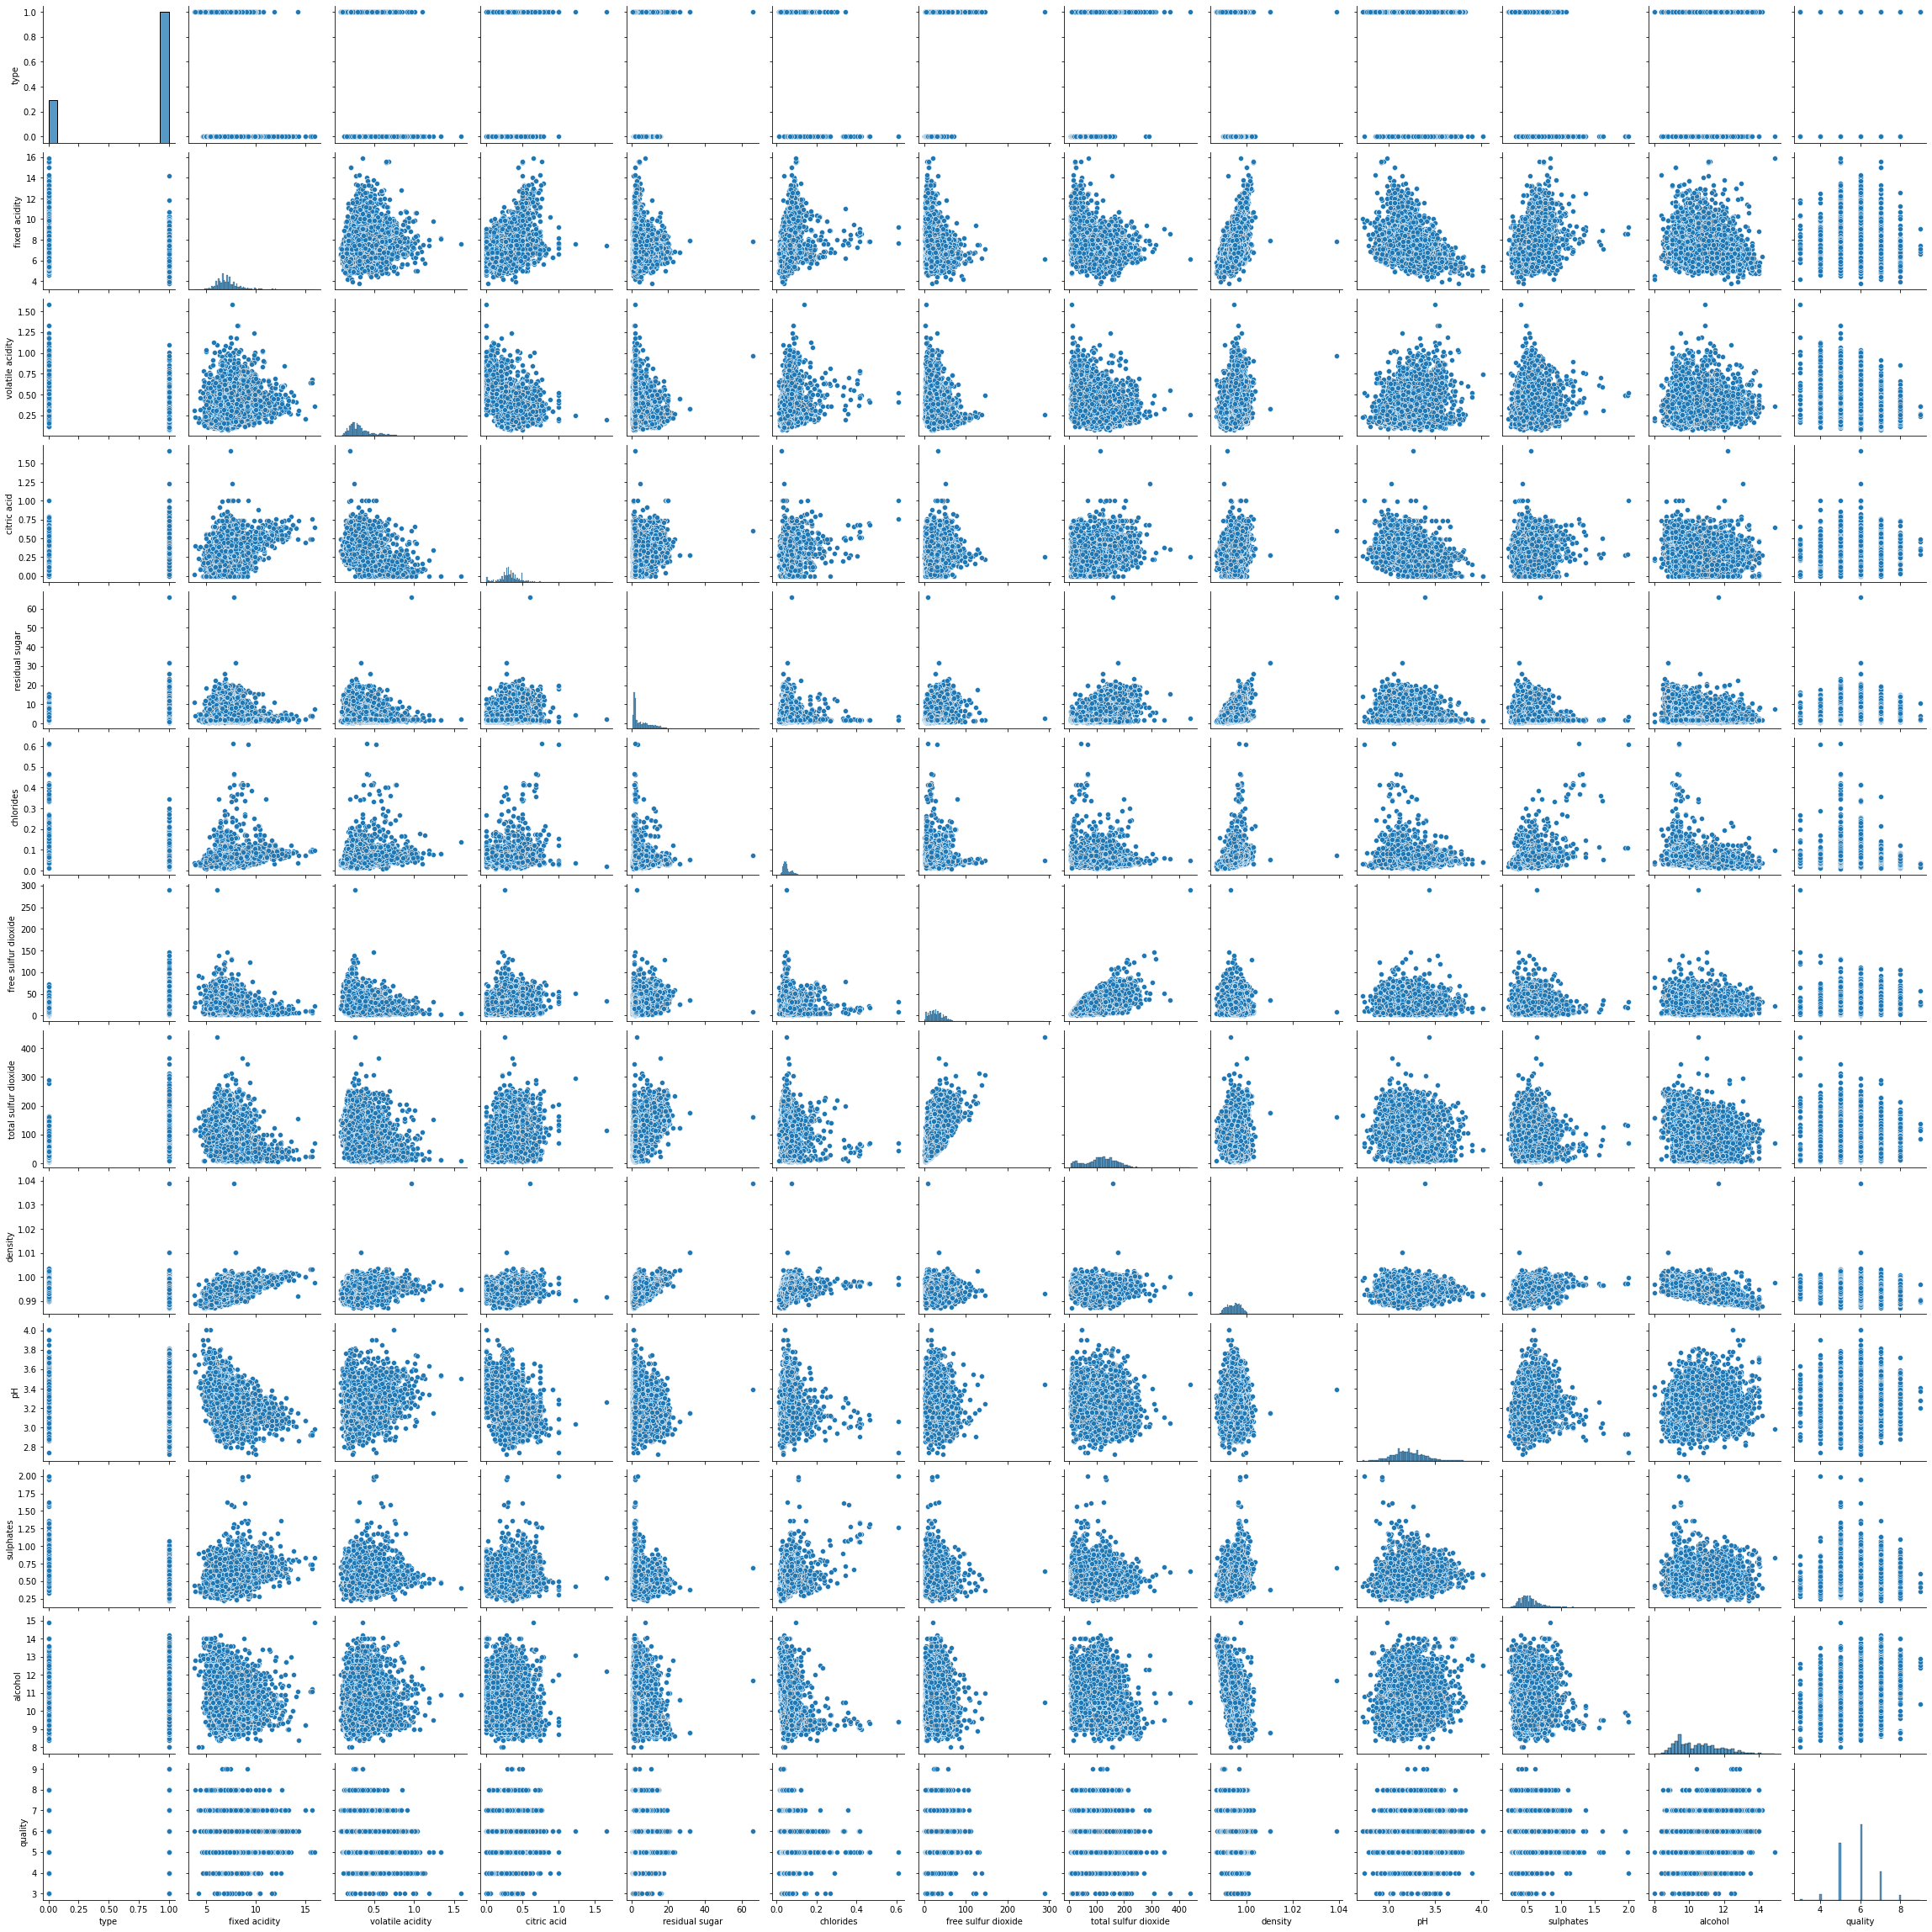

<Figure size 720x720 with 0 Axes>

In [16]:
sns.pairplot(data=df)
plt.figure(figsize=(10,10))
plt.show()

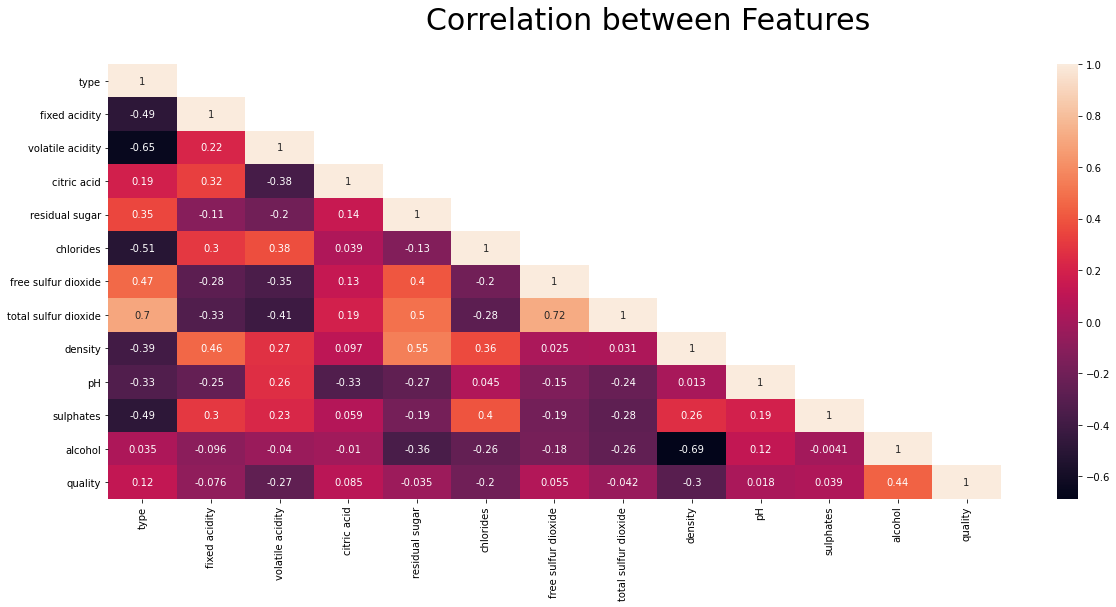

In [17]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Correlation between Features", fontsize=30)
corrcoef = df.corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrcoef, mask=mask, annot=True,ax=ax)
plt.show();

In [18]:
def ZRscore_outlier(col,dataframe):
    out = []
    med = np.median(col)
    ma = stats.median_abs_deviation(col)
    for i in col: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    #print("Outliers:",out)
    print("number of outliers:", len(out))

In [19]:
for i in df.drop('type',axis=1):
    print('\n')
    print(i+':')
    ZRscore_outlier(df[i],df)




fixed acidity:
number of outliers: 353


volatile acidity:
number of outliers: 402


citric acid:
number of outliers: 203


residual sugar:
number of outliers: 1101


chlorides:
number of outliers: 411


free sulfur dioxide:
number of outliers: 41


total sulfur dioxide:
number of outliers: 7


density:
number of outliers: 3


pH:
number of outliers: 35


sulphates:
number of outliers: 176


alcohol:
number of outliers: 1


quality:
number of outliers: 0


In [20]:
df.columns.to_list()

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [21]:
X=df.drop('type',axis=1)
y=df['type']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
dt=DecisionTreeClassifier()

In [24]:
model_svc=SVC(kernel='rbf',C=0.1,gamma='auto')

In [25]:
xg=XGBClassifier()

In [26]:
model_gb=GaussianNB()

In [27]:
def get_results(train_x, train_y, test_x, test_y, classifiers): 
    names = []
    accuracy_list = [] 
    precision_list = []
    recall_list = [] 
    f1_list = []
    for x in classifiers:
        
        x.fit(train_x, train_y)
        y_preds = x.predict(test_x) 
        accuracy = round(x.score(test_x, test_y), 3) 
        precision = round(precision_score(y_test, y_preds), 3)        
        recall = round(recall_score(y_test, y_preds), 3)
        f1 = round(f1_score(y_test, y_preds), 3)
        
        names.append(x.__class__.__name__)
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
    
    results = {'Model': names, 
               'Accuracy': accuracy_list, 
               'Precision': precision_list, 
               'Recall': recall_list, 
               'F1': f1_list}
    
    resultsDF = pd.DataFrame.from_dict(results)
    
    return resultsDF

In [28]:
get_results(X_train,y_train,X_test,y_test,[model_svc,xg,model_svc,model_gb])

[13:02:13] WARNING: /private/var/folders/nx/znrd6q191271k3609_22qcz40000gn/T/pip-install-d5myuc3o/xgboost_1c0e3774c049455280a321bf7af215a2/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Precision,Recall,F1
0,SVC,0.889,0.873,0.997,0.931
1,XGBClassifier,0.996,0.996,0.999,0.997
2,SVC,0.889,0.873,0.997,0.931
3,GaussianNB,0.971,0.991,0.971,0.981


In [29]:
model_svc.fit(X_train,y_train)

[13:02:14] WARNING: /private/var/folders/nx/znrd6q191271k3609_22qcz40000gn/T/pip-install-d5myuc3o/xgboost_1c0e3774c049455280a321bf7af215a2/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [31]:
xg.fit(X_train,y_train)

[13:03:37] WARNING: /private/var/folders/nx/znrd6q191271k3609_22qcz40000gn/T/pip-install-d5myuc3o/xgboost_1c0e3774c049455280a321bf7af215a2/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
model_gb.fit(X_train,y_train)

GaussianNB()

In [33]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

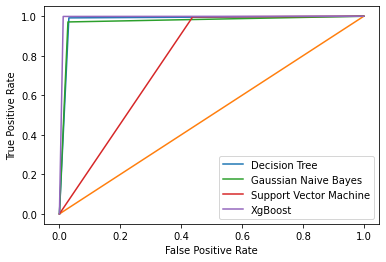

In [34]:
#Roc curve for Decision Tree model


fpr, tpr, _ = roc_curve(y_test, dt.predict(X_test))

svc_fpr,svc_tpr,_=roc_curve(y_test,model_svc.predict(X_test))
xg_fpr,xg_tpr,_=roc_curve(y_test,xg.predict(X_test))








# roc curve for tpr = fpr 

random_probs = [0 for i in range(len(y_test))]

p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)



#ROC curve for Naive bayes

n_fpr, n_tpr, _ = roc_curve(y_test,model_gb.predict(X_test))



#AUC score

aucDT = roc_auc_score(y_test, model_gb.predict(X_test))

aucNoModel= roc_auc_score(y_test, random_probs)



aucNaive = roc_auc_score(y_test, model_gb.predict(X_test))
aucSVC = roc_auc_score(y_test, model_svc.predict(X_test))


aucXG = roc_auc_score(y_test, xg.predict(X_test))






#create ROC curve

plt.plot(fpr,tpr,label= "Decision Tree")

plt.plot(p_fpr,p_tpr)

plt.plot(n_fpr,n_tpr,label= "Gaussian Naive Bayes")

plt.plot(svc_fpr,svc_tpr,label= "Support Vector Machine")


plt.plot(xg_fpr,xg_tpr,label= "XgBoost")




plt.legend()

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

In [35]:

print("AUC score with Decision Tree is {} and without Decision Tree is {}".format(aucDT,aucNoModel))


print("AUC score with Naive Bayes is {} and without Naive Bayes is {}".format(aucNaive,aucNoModel))

print("AUC score with Support Vector is {} and without Suport Vector is {}".format(aucSVC,aucNoModel))

print("AUC score with XGBoost is {} and without XGBoost is {}".format(aucXG,aucNoModel))




AUC score with Decision Tree is 0.9716067190768305 and without Decision Tree is 0.5
AUC score with Naive Bayes is 0.9716067190768305 and without Naive Bayes is 0.5
AUC score with Support Vector is 0.7795111014450109 and without Suport Vector is 0.5
AUC score with XGBoost is 0.993273886817074 and without XGBoost is 0.5
